# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, validation_curve, StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, accuracy_score, recall_score, plot_confusion_matrix, plot_roc_curve
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel, RFECV, RFE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.svm import SVC
from sklearn.utils import shuffle, resample

In [3]:
import re, sys, os, warnings, random

from collections import Counter
from linecache import getline
from pathlib import Path

sys.path.append(str(Path(os.getcwd()).parent) + '/py')
print(os.getcwd())

C:\Users\BigBadBraddy\Desktop\UCD\FYP\fyp-braddy\COMP30910\Solver\Modules\ipynb


In [4]:
import Constants as c

# Import data

In [5]:
cvrp = pd.read_csv('../../Data/data.csv', index_col=0)
cvrp

,U_NODE_ID,V_NODE_ID,U_X,U_Y,V_X,V_Y,IS_NODE_U_DEPOT,IS_NODE_V_DEPOT,IS_OPTIMAL_EDGE,EDGE_WEIGHT,...,NODE_U_DIST_TO_DEPOT,NODE_V_DIST_TO_DEPOT,NODE_AVERAGE_DIST_TO_DEPOT,NODE_U_DIST_TO_NEAREST_NEIGHBOUR,NODE_V_DIST_TO_NEAREST_NEIGHBOUR,NODE_AVERAGE_DIST_TO_NEAREST_NEIGHBOUR,ANGLE_DEGREE_TO_DEPOT,U_NODE_DBSCAN,V_NODE_DBSCAN,AVERAGE_NODE_DBSCAN
0,1,2,82,76,96,44,1,0,0,1.091516,...,0.000000,1.091516,17.464249,0.0,0.0,0.0,0.000000,0.000000,0.031250,0.015625
1,1,3,82,76,50,5,1,0,0,2.433691,...,0.000000,2.433691,38.939055,0.0,0.0,0.0,0.000000,0.000000,0.062500,0.031250
2,1,4,82,76,49,8,1,0,0,2.362012,...,0.000000,2.362012,37.792195,0.0,0.0,0.0,0.000000,0.000000,0.093750,0.046875
3,1,5,82,76,13,7,1,0,0,3.049398,...,0.000000,3.049398,48.790368,0.0,0.0,0.0,0.000000,0.000000,0.125000,0.062500
4,1,6,82,76,29,89,1,0,0,1.705345,...,0.000000,1.705345,27.285527,0.0,0.0,0.0,0.000000,0.000000,0.156250,0.078125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76369,70,65,50,4,15,5,0,0,0,0.500204,...,0.533758,0.614452,40.187355,0.0,0.0,0.0,72.839284,0.957143,0.885714,0.921429
76370,70,66,50,4,50,70,0,0,0,0.942857,...,0.533758,0.451754,34.492930,0.0,0.0,0.0,15.524092,0.957143,0.900000,0.928571
76371,70,67,50,4,57,72,0,0,0,0.976562,...,0.533758,0.517648,36.799213,0.0,0.0,0.0,21.401541,0.957143,0.914286,0.935714
76372,70,68,50,4,45,42,0,0,0,0.547536,...,0.533758,0.076931,21.374124,0.0,0.0,0.0,8.028385,0.957143,0.928571,0.942857


In [6]:
cvrp.pop(c.U_NODE_ID)
cvrp.pop(c.V_NODE_ID)
cvrp.pop(c.U_Y)
cvrp.pop(c.U_X)
cvrp.pop(c.V_X)
cvrp.pop(c.V_Y)
cvrp.pop(c.EDGE_WEIGHT_NON_NORMALISED)

# cvrp.pop(c.AVERAGE_NODE_DBSCAN)
# cvrp.pop(c.U_NODE_DBSCAN)
# cvrp.pop(c.V_NODE_DBSCAN)

# cvrp.pop(c.NODE_U_EUC_DISTANCE_TO_NEAREST_CONVEX_HULL_VERTEX)
# cvrp.pop(c.NODE_V_EUC_DISTANCE_TO_NEAREST_CONVEX_HULL_VERTEX)
# cvrp.pop(c.CONVEX_HULL_EDGE_LENGTH)

# A
# cvrp.pop(c.NODE_U_DIST_TO_CENTROID)
# cvrp.pop(c.NODE_V_DIST_TO_CENTROID)
# cvrp.pop(c.NODE_AVERAGE_DIST_TO_CENTROID)

# B
# cvrp.pop(c.NODE_U_DIST_TO_NEAREST_NEIGHBOUR)
# cvrp.pop(c.NODE_V_DIST_TO_NEAREST_NEIGHBOUR)
# cvrp.pop(c.NODE_AVERAGE_DIST_TO_NEAREST_NEIGHBOUR)

# # C
# cvrp.pop(c.V_NODE_DEMAND)
# cvrp.pop(c.U_NODE_DEMAND)

# # D
# cvrp.pop(c.GLOBAL_RANK)

0        34.928498
1        77.878110
2        75.584390
3        97.580736
4        54.571055
           ...    
76369    35.014283
76370    66.000000
76371    68.359345
76372    38.327536
76373    31.384710
Name: EDGE_WEIGHT_NON_NORMALISED, Length: 76374, dtype: float64

In [7]:
cvrp['FILE_NAME'].nunique()

30

In [8]:
groups = [df for _, df in cvrp.groupby('FILE_NAME')]
shuffle(groups, random_state=42)

cvrp = pd.concat(groups).reset_index(drop=True)

In [9]:
cvrp

,IS_NODE_U_DEPOT,IS_NODE_V_DEPOT,IS_OPTIMAL_EDGE,EDGE_WEIGHT,GLOBAL_RANK,U_NODE_LOCAL_EDGE_RANK,V_NODE_LOCAL_EDGE_RANK,LP_RELAXATION,FILE_NAME,U_NODE_DEMAND,...,NODE_U_DIST_TO_DEPOT,NODE_V_DIST_TO_DEPOT,NODE_AVERAGE_DIST_TO_DEPOT,NODE_U_DIST_TO_NEAREST_NEIGHBOUR,NODE_V_DIST_TO_NEAREST_NEIGHBOUR,NODE_AVERAGE_DIST_TO_NEAREST_NEIGHBOUR,ANGLE_DEGREE_TO_DEPOT,U_NODE_DBSCAN,V_NODE_DBSCAN,AVERAGE_NODE_DBSCAN
0,1,0,0,1.091516,352,1.091516,1.091516,0.0,A-n32-k5.txt,0.000000,...,0.000000,1.091516,17.464249,0.0,0.0,0.0,0.000000,0.000000,0.031250,0.015625
1,1,0,0,2.433691,136,2.433691,2.433691,0.0,A-n32-k5.txt,0.000000,...,0.000000,2.433691,38.939055,0.0,0.0,0.0,0.000000,0.000000,0.062500,0.031250
2,1,0,0,2.362012,148,2.362012,2.362012,0.0,A-n32-k5.txt,0.000000,...,0.000000,2.362012,37.792195,0.0,0.0,0.0,0.000000,0.000000,0.093750,0.046875
3,1,0,0,3.049398,37,3.049398,3.049398,0.0,A-n32-k5.txt,0.000000,...,0.000000,3.049398,48.790368,0.0,0.0,0.0,0.000000,0.000000,0.125000,0.062500
4,1,0,0,1.705345,261,1.705345,1.705345,0.0,A-n32-k5.txt,0.000000,...,0.000000,1.705345,27.285527,0.0,0.0,0.0,0.000000,0.000000,0.156250,0.078125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76369,0,0,0,0.500204,560,0.500204,0.500204,0.0,P-n70-k10.txt,0.114286,...,0.533758,0.614452,40.187355,0.0,0.0,0.0,72.839284,0.957143,0.885714,0.921429
76370,0,0,0,0.942857,52,0.942857,0.942857,0.0,P-n70-k10.txt,0.114286,...,0.533758,0.451754,34.492930,0.0,0.0,0.0,15.524092,0.957143,0.900000,0.928571
76371,0,0,0,0.976562,36,0.976562,0.976562,0.0,P-n70-k10.txt,0.114286,...,0.533758,0.517648,36.799213,0.0,0.0,0.0,21.401541,0.957143,0.914286,0.935714
76372,0,0,0,0.547536,501,0.547536,0.547536,0.0,P-n70-k10.txt,0.114286,...,0.533758,0.076931,21.374124,0.0,0.0,0.0,8.028385,0.957143,0.928571,0.942857


In [10]:
cvrp['FILE_NAME'].unique()

array(['A-n32-k5.txt', 'A-n33-k6.txt', 'A-n39-k6.txt', 'A-n48-k7.txt',
       'A-n53-k7.txt', 'A-n60-k9.txt', 'A-n63-k9.txt', 'A-n69-k9.txt',
       'B-n31-k5.txt', 'B-n35-k5.txt', 'B-n41-k6.txt', 'B-n50-k7.txt',
       'B-n56-k7.txt', 'B-n57-k9.txt', 'B-n63-k10.txt', 'B-n68-k9.txt',
       'E-n101-k8.txt', 'E-n22-k4.txt', 'E-n23-k3.txt', 'E-n30-k3.txt',
       'E-n33-k4.txt', 'E-n51-k5.txt', 'E-n76-k7.txt', 'P-n16-k8.txt',
       'P-n20-k2.txt', 'P-n23-k8.txt', 'P-n40-k5.txt', 'P-n50-k10.txt',
       'P-n60-k10.txt', 'P-n70-k10.txt'], dtype=object)

In [11]:
# temp = file_names = cvrp['FILE_NAME'].unique()
# count = len(file_names)

# training_split = 0.66
# test_split = 1 - training_split

# idx_training = round(count * training_split) - 1
# training_file_name = file_names[idx_training]
# training_ratio = cvrp.index[cvrp['FILE_NAME'] == training_file_name].tolist()[0]
# file_names = file_names[idx_training + 1:]
# # 0.16666666666
# idx_validation = round(count * test_split) - 1
# validation_file_name = file_names[idx_validation]
# validation_ratio = cvrp.index[cvrp['FILE_NAME'] == validation_file_name].tolist()[0]



In [12]:
# train_list = []
# test_list = []
# val_list = []

# grouped_df = cvrp.groupby('IS_OPTIMAL_EDGE')

# # ITERATE THROUGH EACH SUBSET DF
# for i, g in grouped_df:
#     # STRATIFY THE g (CLASS) DATA FRAME
# #     train, test, val = np.split(g, [int(.8 * len(g)), int(.9 * len(g))])
#     train, test, validate = np.split(g, [int(training_ratio), int(validation_ratio)])

#     train_list.append(train)
#     test_list.append(test)
#     val_list.append(validate)

# train = pd.concat(train_list)
# test = pd.concat(test_list)
# validate = pd.concat(val_list)

In [13]:
# train, test, validate = np.split(cvrp, [int(training_ratio), int(validation_ratio)])

In [14]:
# frames = [test, validate]
# test = pd.concat(frames)

In [15]:
# file_names = train['FILE_NAME'].unique()
# train.pop('FILE_NAME')

In [16]:
# file_names = validate['FILE_NAME'].unique()
# validate.pop('FILE_NAME')

In [17]:
# file_names = test['FILE_NAME'].unique()
# test.pop('FILE_NAME')

In [18]:
cvrp.pop('FILE_NAME')

0         A-n32-k5.txt
1         A-n32-k5.txt
2         A-n32-k5.txt
3         A-n32-k5.txt
4         A-n32-k5.txt
             ...      
76369    P-n70-k10.txt
76370    P-n70-k10.txt
76371    P-n70-k10.txt
76372    P-n70-k10.txt
76373    P-n70-k10.txt
Name: FILE_NAME, Length: 76374, dtype: object

# Train test split

In [19]:
y = cvrp.pop("IS_OPTIMAL_EDGE")
X = cvrp.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Stratified Shuffle Split

In [20]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=.2, random_state=42)

# Random Undersampling

In [21]:
rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train))

Resampled dataset shape Counter({0: 2530, 1: 2530})


In [22]:
# from sklearn.neighbors import LocalOutlierFactor

# lof = LocalOutlierFactor()
# yhat = lof.fit_predict(X_train)

# # select all rows that are not outliers
# mask = yhat != -1
# X_train, y_train = X_train[mask, :], y_train[mask]

# Helper functions

In [23]:
def plot_validation_curve(train_scores, test_scores, param_range):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.title("Validation Curve with SVM")
    plt.xlabel(r"$\gamma$")
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.semilogx(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()

def calc_conf_matrix(clf, X, y):
    y_pred = clf.predict(X)
    return confusion_matrix(y, y_pred)

def prune_percentage(conf_matrix):
    return round((conf_matrix[0][0] + conf_matrix[1][0]) / (np.sum(conf_matrix[:])), 3)

def eval_model(clf, X_train, y_train, X_test, y_test):
#     print("Train Recall: ", cross_val_score(clf, X_train, y_train, cv=sss, n_jobs=-1, scoring='recall').mean())
#     print("Train Accuracy: ", cross_val_score(clf, X_train, y_train, cv=sss, n_jobs=-1, scoring='accuracy').mean())

    new_clf = clf.fit(X_train, y_train)
    y_pred = new_clf.predict(X_test)
#     print("Test Recall: ", recall_score(y_pred, y_test))
#     print("Test Accuracy: ", accuracy_score(y_pred, y_test))
    
    classification_report(y_test, y_pred)
    
    plot_roc_curve(new_clf, X_test, y_test)    
        
    return new_clf

start = 0
step = 0.1
thresholds = [start + (x * step) for x in range(0, 11)]

def plot_recall_prune_percentage(decision_function, y):
    recall, prune_percentage = calc_recall_prune_percentage(decision_function, y)
    print(prune_percentage)
    plot_recall_threshold_prune_percentage(recall, prune_percentage)
    plot_prune_percentage_recall(prune_percentage, recall)

def calc_recall_prune_percentage(decision_function, y):
    recall = []
    prune_percent = []
    
    for t in thresholds:   
        # Set the value of decision threshold. 
        decision_threshold = t

        # Desired prediction to increase precision value. 
        desired_predict = [] 

        for i in decision_function: 
            if i < decision_threshold: 
                desired_predict.append(0) 
            else: 
                desired_predict.append(1) 
        
        conf_matrix = confusion_matrix(y, desired_predict)
        prune_percent.append(prune_percentage(conf_matrix))
        recall.append(recall_score(y, desired_predict))
        
    return recall, prune_percent


def plot_recall_threshold_prune_percentage(recall, prune_percentage):        
    plt.rcParams["figure.figsize"] = [16, 9]
    fig, host = plt.subplots()
    fig.subplots_adjust(right=0.75)

    par1 = host.twinx()

    p1, = host.plot(thresholds, recall, "b-", label="Recall")
    p2, = par1.plot(thresholds, prune_percentage, "r-", label="Prune Percentage")

    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.yticks(np.arange(0, 1.1, 0.1))

    host.set_xlim(0, 1)
    host.set_ylim(0, 1.1)

    host.set_xlabel("Threshold")
    host.set_ylabel("Recall")
    par1.set_ylabel("Prune Percentage")

    host.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())

    host.set_title('Threshold vs Recall and Prune Percentage')

    tkw = dict(size=4, width=1.5)
    host.tick_params(axis='y', colors=p1.get_color(), **tkw)
    par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
    host.tick_params(axis='x', **tkw)

    lines = [p1, p2]

    host.legend(lines, [l.get_label() for l in lines])
    
def plot_prune_percentage_recall(prune_percentage, recall):
    plt.rcParams["figure.figsize"] = [16, 9]
    plt.figure()
    plt.plot(prune_percentage, recall, c ='b') 
    plt.xlabel("Prune Percentage")
    plt.ylabel("Recall")
    plt.xlim(0, 1)
    plt.ylim(0, 1.1)
    plt.title('Prune Percentage vs Recall')
    plt.show() 

# Naive train test predictions

In [24]:
# Baseline - comparing model accuracy using all features across classifiers 
classifiers = [
    RandomForestClassifier(),
    SVC(),
    GaussianNB(),
    LogisticRegression()
]


# Naive Train Accuracy
algo = []
scores = []
s = []
for clf in classifiers:
    algo.append(clf.__class__.__name__)
    scores.append(cross_val_score(clf, X_train, y_train, cv=sss, n_jobs=-1, scoring='recall').mean())
    s.append(cross_val_score(clf, X_train, y_train, cv=sss, n_jobs=-1, scoring='accuracy').mean())
warnings.filterwarnings('ignore')
Naivescore_df_Train = pd.DataFrame({'Algorithm': algo, 'Score': scores}).set_index('Algorithm')
acc_train = pd.DataFrame({'Algorithm': algo, 'Score': s}).set_index('Algorithm')

# Naive Test Accuracy

algo = []
scores = []
s = []
for clf in classifiers:
    clf = clf.fit(X_train, y_train)
    algo.append(clf.__class__.__name__)
    y_pred = clf.predict(X_test)
    scores.append(recall_score(y_test, y_pred))
    s.append(accuracy_score(y_test, y_pred))
warnings.filterwarnings('ignore')
Naivescore_df_Test  = pd.DataFrame({'Algorithm': algo, 'Score': scores}).set_index('Algorithm')
acc_test = pd.DataFrame({'Algorithm': algo, 'Score': s}).set_index('Algorithm')



# Plotting Recall results

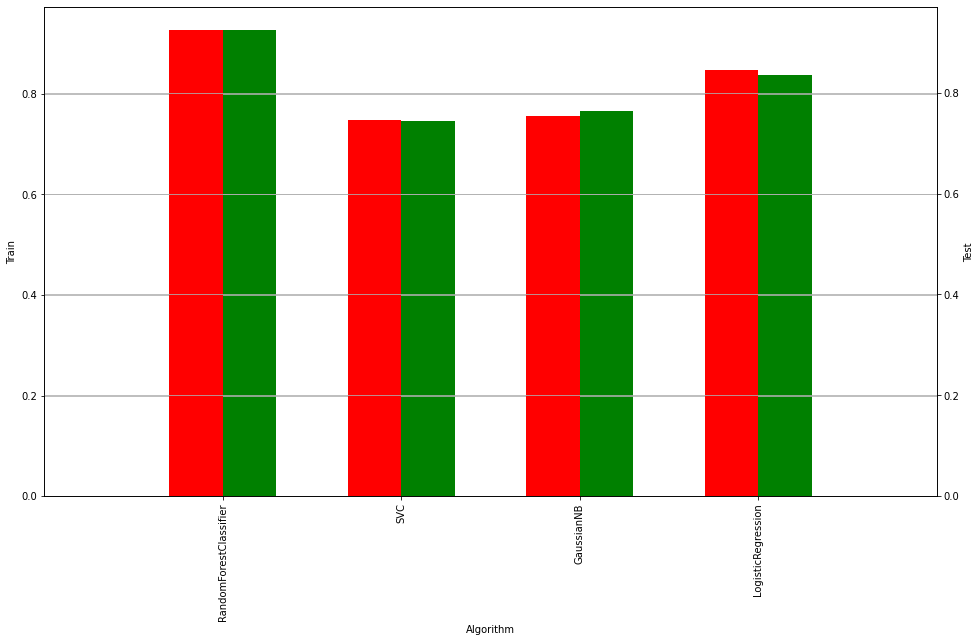

In [25]:
# Bar plot between Train and Test Accuracy
fig = plt.figure(figsize=(16,9)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .3

Naivescore_df_Train.Score.plot(kind='bar', color='green', ax=ax, width=width, position=0)
Naivescore_df_Test.Score.plot(kind='bar', color='red', ax=ax2, width=width, position=1)


ax.grid(None, axis='y')
ax2.grid(None)

ax.set_ylabel('Train')
ax2.set_ylabel('Test')

ax.set_xlim(-1,4)
plt.show()

# Plotting accuracy results

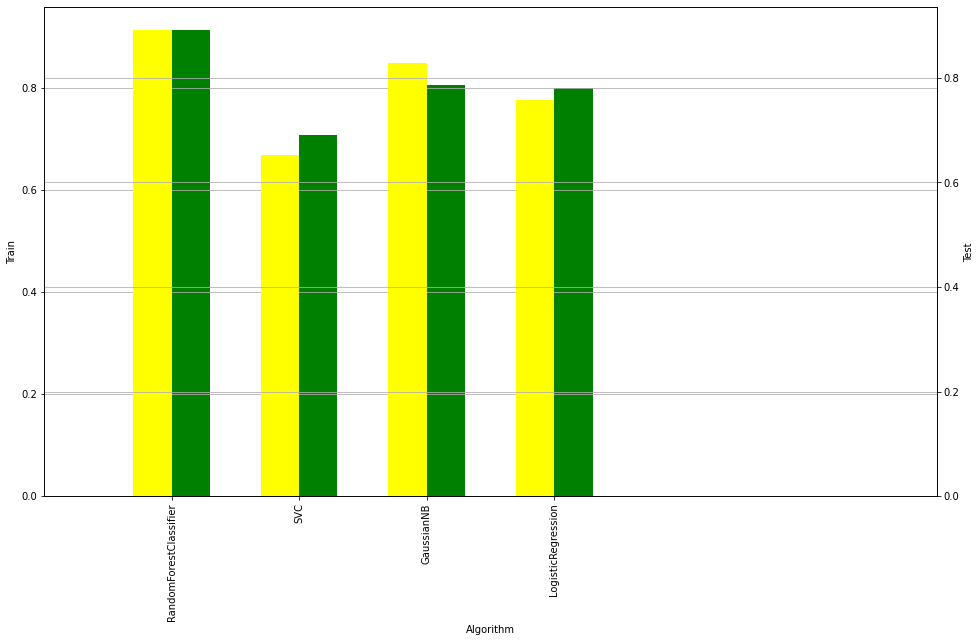

In [26]:
# Bar plot between Train and Test Accuracy
fig = plt.figure(figsize=(16,9)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a

width = .3

acc_train.Score.plot(kind='bar', color='green', ax=ax, width = width, position=0)
acc_test.Score.plot(kind='bar', color='yellow', ax=ax2, width = width, position=1)

ax.grid(None, axis='y')
ax2.grid(None)

ax.set_ylabel('Train')
ax2.set_ylabel('Test')

ax.set_xlim(-1,6)
plt.show()

# Training models

# Feature Importance


EDGE_WEIGHT
U_NODE_LOCAL_EDGE_RANK
V_NODE_LOCAL_EDGE_RANK
LP_RELAXATION
V_NODE_DEMAND
REDUCED_COST
NODE_U_DIST_TO_DEPOT
ANGLE_DEGREE_TO_DEPOT


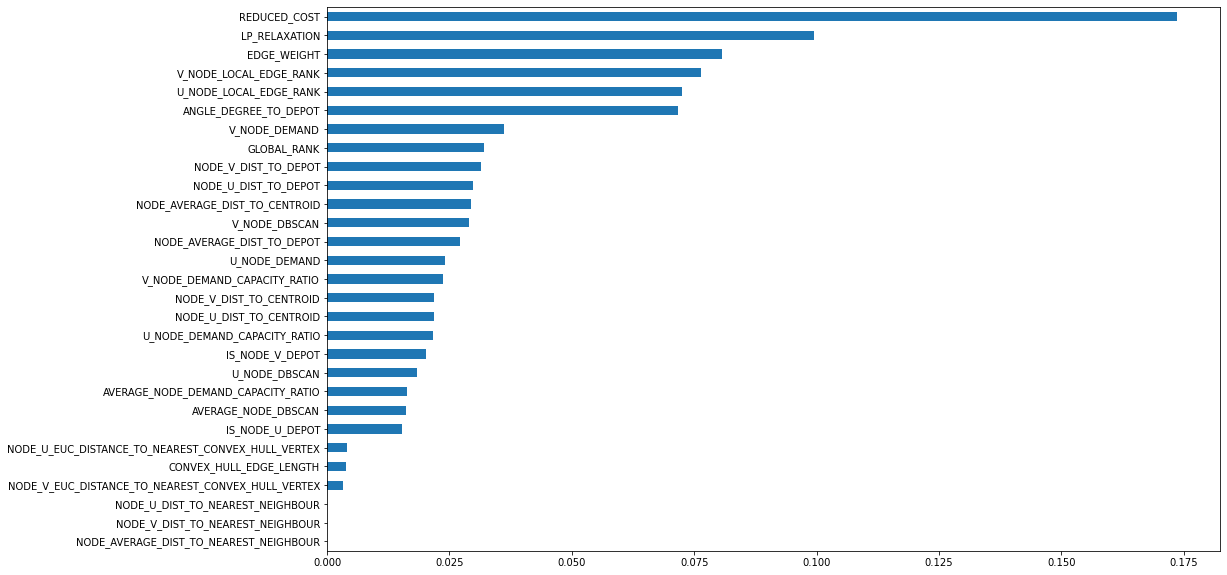

In [27]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(X_train, y_train)
feat_labels = list(cvrp.columns)

fig = plt.figure(figsize=(16,10))    

feat_importances = pd.Series(clf.feature_importances_, index=feat_labels)
feat_importances.nsmallest(50).plot(kind='barh')

sfm = SelectFromModel(clf)

sfm.fit(X_train, y_train)
print()

feats = []
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])
    feats.append(feat_labels[feature_list_index])
    
rf_X_train = sfm.transform(X_train)
rf_X_test = sfm.transform(X_test)


# RFE & RFECV

In [28]:
def perform_rfecv(clf, X, y):
    rfecv = RFECV(estimator=clf, step=1, n_jobs=-1, cv=sss, scoring='recall')
    rfecv.fit(X, y)
    print('Optimal number of features :', rfecv.n_features_)

    # Plot showing the Cross Validation score
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score (nb of correct classifications)")
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    plt.show()
    
    return rfecv
    
def perform_rfe(clf, X, y, rfecv, feats):
    # Applying RFE with optimal number of features
    rfe = RFE(estimator=clf, n_features_to_select=rfecv.n_features_, step=1)
    rfe = rfe.fit(X, y)

    temp = []
    arr = rfe.get_support()
    for idx in range(0 , len(arr)):
        if arr[idx] == True:
            print(feats[idx])
            temp.append(feats[idx])

    X_important_train = rfe.transform(X)
    X_important_test = rfe.transform(X_test)

    eval_model(clf, X_important_train, y, X_important_test, y_test)

    return X_important_train, X_important_test, temp

# RandomForest

Optimal number of features : 23


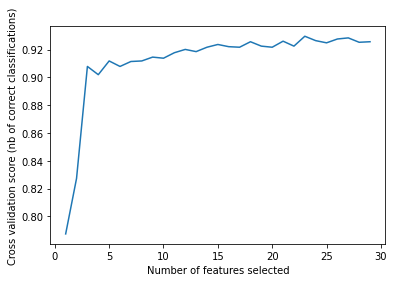

In [29]:
# Applying RFE Cross validation to find number of features
rfecv = perform_rfecv(RandomForestClassifier(), X_train, y_train)

IS_NODE_U_DEPOT
IS_NODE_V_DEPOT
EDGE_WEIGHT
GLOBAL_RANK
U_NODE_LOCAL_EDGE_RANK
V_NODE_LOCAL_EDGE_RANK
LP_RELAXATION
U_NODE_DEMAND
V_NODE_DEMAND
U_NODE_DEMAND_CAPACITY_RATIO
V_NODE_DEMAND_CAPACITY_RATIO
AVERAGE_NODE_DEMAND_CAPACITY_RATIO
REDUCED_COST
NODE_U_DIST_TO_CENTROID
NODE_V_DIST_TO_CENTROID
NODE_AVERAGE_DIST_TO_CENTROID
NODE_U_DIST_TO_DEPOT
NODE_V_DIST_TO_DEPOT
NODE_AVERAGE_DIST_TO_DEPOT
ANGLE_DEGREE_TO_DEPOT
U_NODE_DBSCAN
V_NODE_DBSCAN
AVERAGE_NODE_DBSCAN


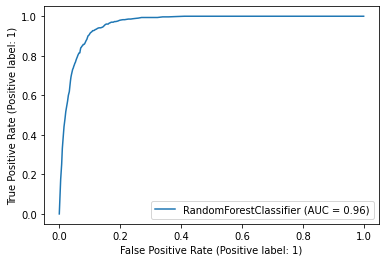

In [30]:
# Applying RFE with optimal number of features
pcatrain, pcatest, rf_clf_feats = perform_rfe(RandomForestClassifier(), X_train, y_train, rfecv, feat_labels)

In [31]:
# hyperparameter tuning
n_estimators = [100, 300, 500, 700, 900, 1100]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(RandomForestClassifier(), hyperF, cv=sss, verbose=1, n_jobs = -1)
bestF = gridF.fit(pcatrain, y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


In [32]:
print("Best n_estimators: ", bestF.best_params_['n_estimators'])
print("Best max_depth: ", bestF.best_params_['max_depth'])
print("Best min_samples_split: ", bestF.best_params_['min_samples_split'])
print("Best min_samples_leaf: ", bestF.best_params_['min_samples_leaf'])

Best n_estimators:  900
Best max_depth:  25
Best min_samples_split:  10
Best min_samples_leaf:  1


In [33]:
rf_clf = RandomForestClassifier(
    n_estimators=bestF.best_params_['n_estimators'], 
    max_depth=bestF.best_params_['max_depth'], 
    min_samples_split=bestF.best_params_['min_samples_split'],
    min_samples_leaf=bestF.best_params_['min_samples_leaf']
)

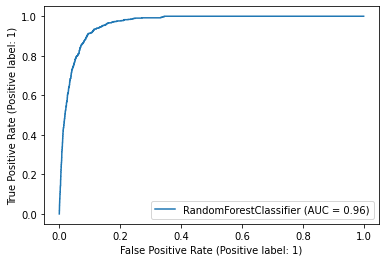

In [34]:
rf_clf = eval_model(rf_clf, pcatrain, y_train, pcatest, y_test)

In [35]:
decision_function = rf_clf.predict_proba(pcatest)[:,1]

[0.0, 0.664, 0.76, 0.798, 0.828, 0.855, 0.881, 0.901, 0.923, 0.95, 1.0]


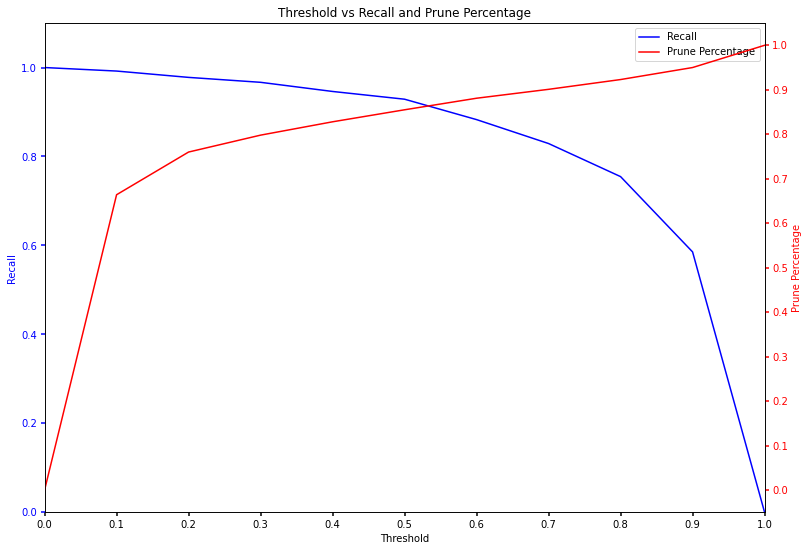

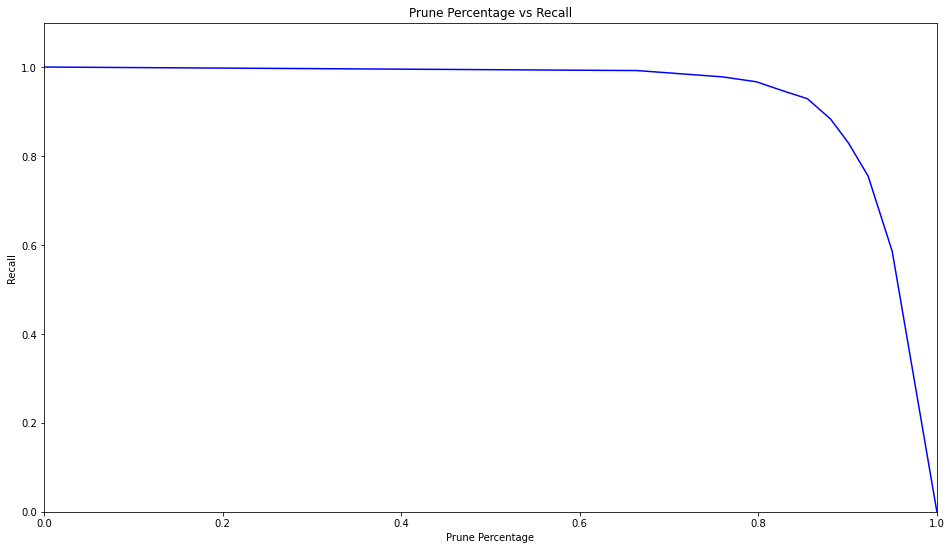

In [36]:
plot_recall_prune_percentage(decision_function, y_test)

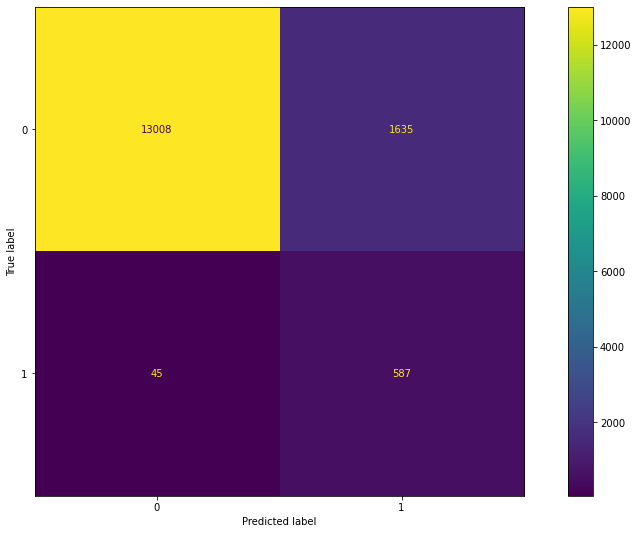

In [37]:
plot_confusion_matrix(rf_clf, pcatest, y_test)
plt.show() 

# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV, RFE

In [39]:
logreg = LogisticRegression(max_iter=5000)

Optimal number of features : 6


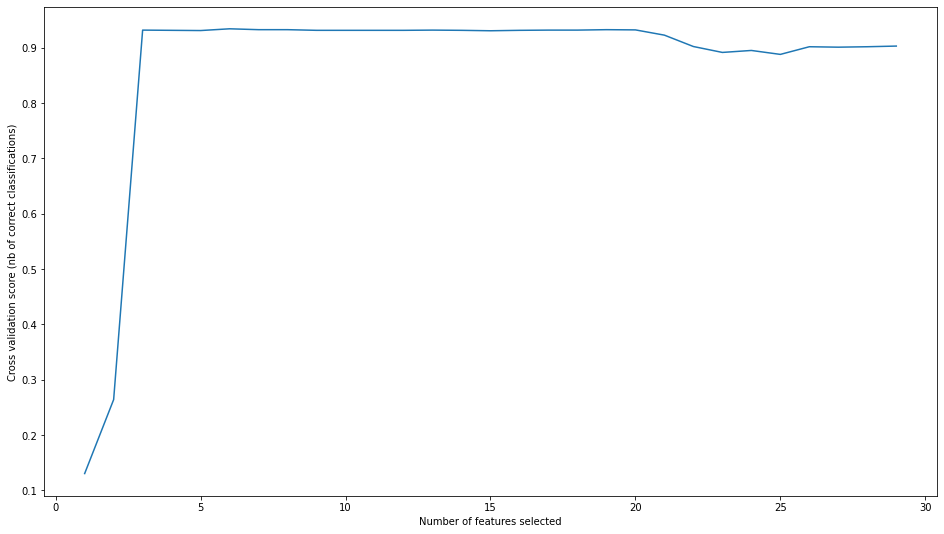

In [40]:
rfecv = perform_rfecv(logreg, X_train, y_train)

<AxesSubplot:>

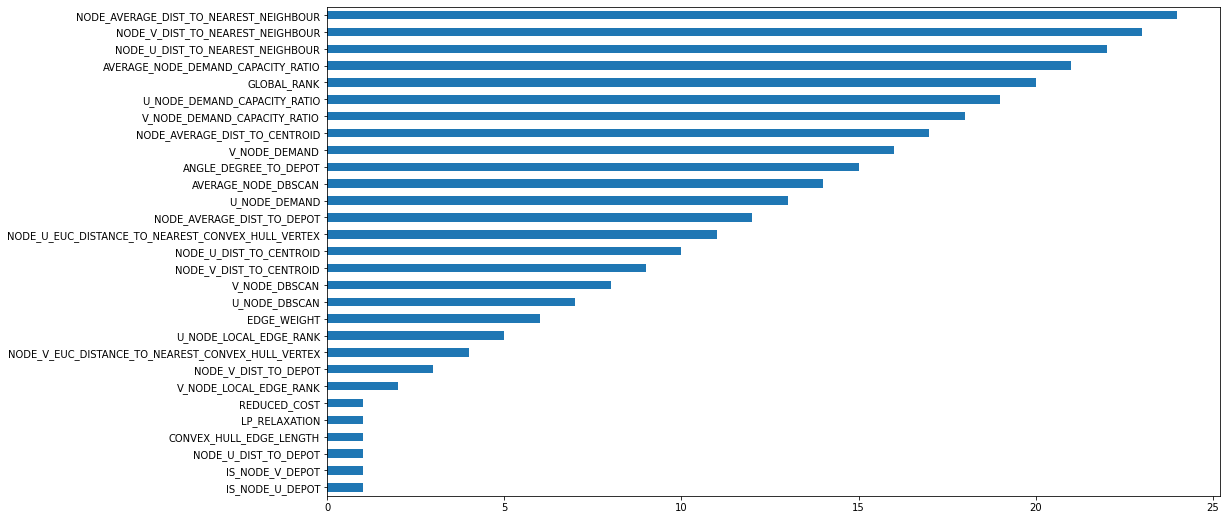

In [41]:
feat_importances = pd.Series(rfecv.ranking_, index=feat_labels)
feat_importances.nsmallest(50).plot(kind='barh')

IS_NODE_U_DEPOT
IS_NODE_V_DEPOT
LP_RELAXATION
REDUCED_COST
CONVEX_HULL_EDGE_LENGTH
NODE_U_DIST_TO_DEPOT


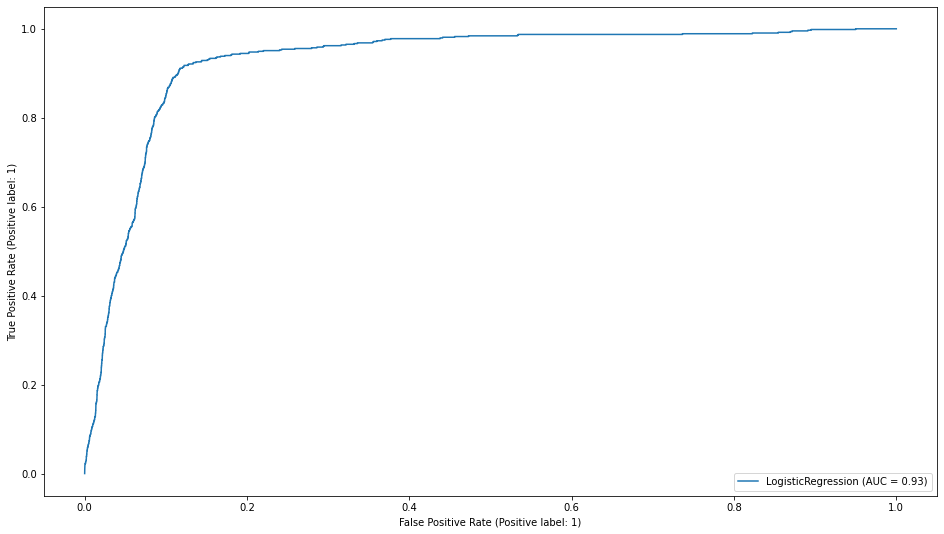

In [42]:
logreg = LogisticRegression(max_iter=5000)
pcatrain, pcatest, lr_clf_feats = perform_rfe(logreg, X_train, y_train, rfecv, feat_labels)

In [43]:
c_values = [100, 10, 1.0, 0.1, 0.01]
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']

logreg = LogisticRegression(max_iter=5000)
logreg.fit(pcatrain, y_train)

# define grid search
grid = dict(C=c_values, solver=solvers, penalty=penalty)
grid_search = GridSearchCV(estimator=logreg, param_grid=grid, n_jobs=-1, cv=sss, scoring='recall', error_score=0)
grid_result = grid_search.fit(pcatest, y_test)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.177778 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


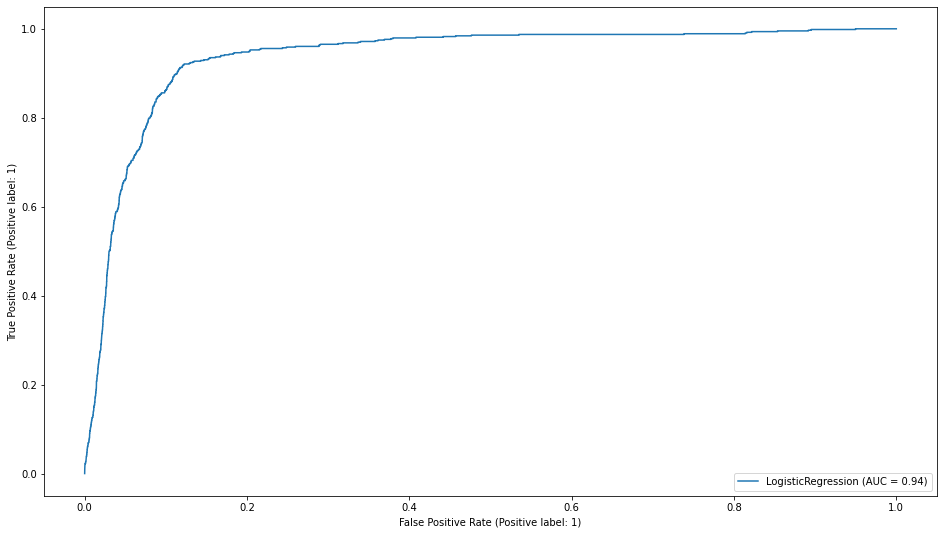

In [44]:
lg_clf = eval_model(LogisticRegression(max_iter=5000, C=grid_result.best_params_['C'], solver=grid_result.best_params_['solver'], penalty=grid_result.best_params_['penalty']), pcatrain, y_train, pcatest, y_test)

In [45]:
decision_function = lg_clf.decision_function(pcatest) 

[0.838, 0.85, 0.863, 0.876, 0.886, 0.894, 0.901, 0.908, 0.914, 0.919, 0.924]


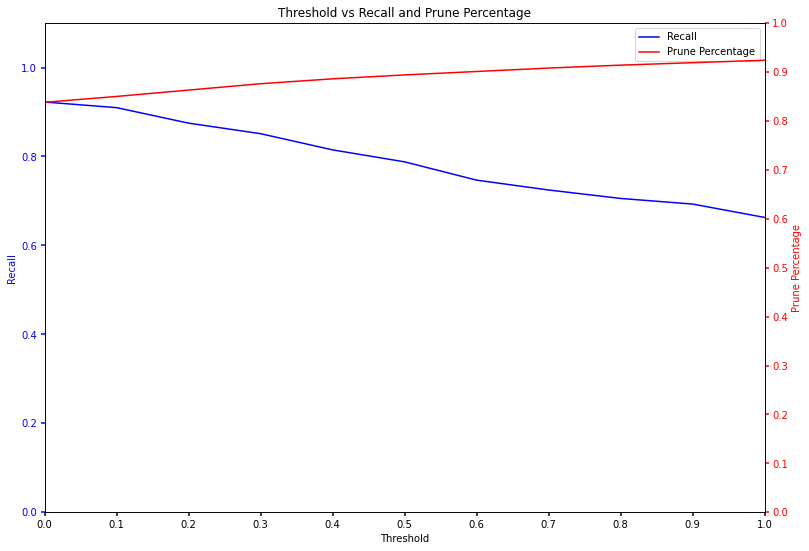

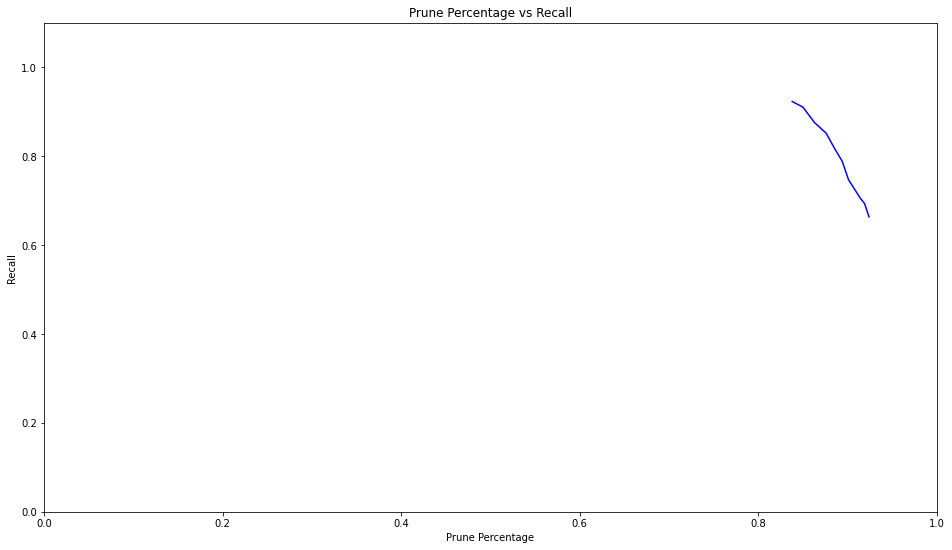

In [46]:
plot_recall_prune_percentage(decision_function, y_test)

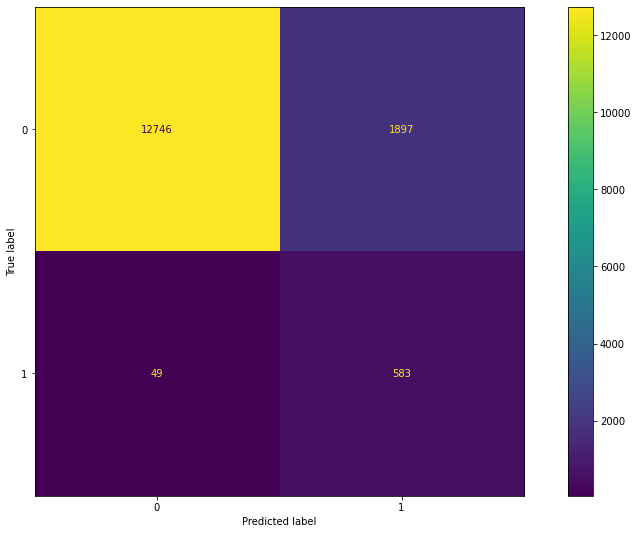

In [47]:
plot_confusion_matrix(lg_clf, pcatest, y_test)
plt.show() 

# Naiive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance

gnb = GaussianNB()
gnb.fit(X_train, y_train)

imps = permutation_importance(gnb, X_test, y_test)


<AxesSubplot:>

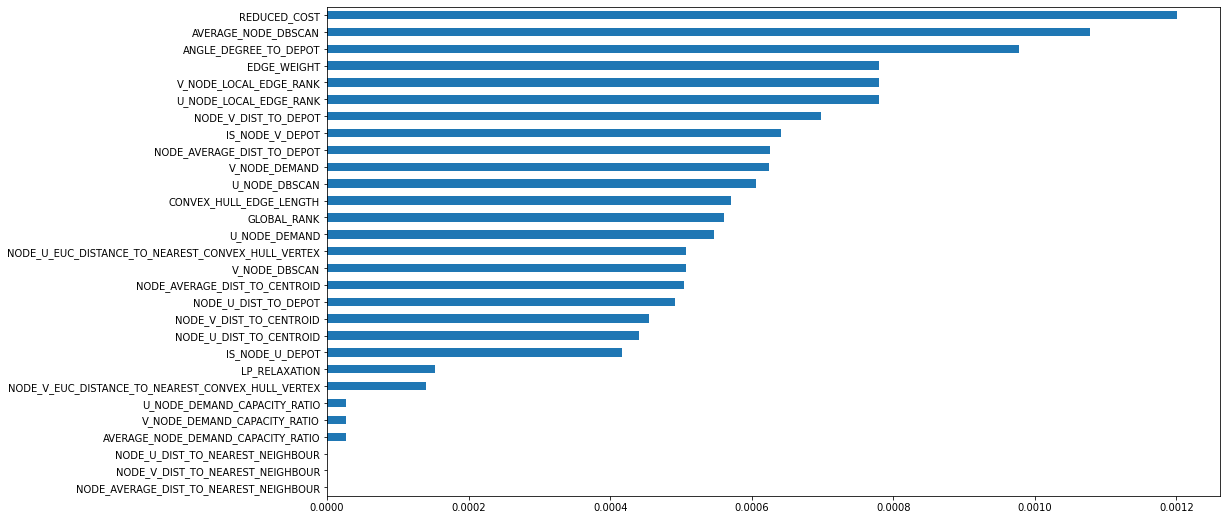

In [49]:
feat_importances = pd.Series(imps.importances_std, index=feat_labels)
feat_importances.nsmallest(50).plot(kind='barh')

In [50]:
sbs = SFS(GaussianNB(), 
          k_features=(1, len(feat_labels)), 
          forward=False, 
          floating=False, 
          scoring='recall',
          cv=sss,
          n_jobs=-1)
sbs = sbs.fit(X_train, y_train)

(<Figure size 1152x648 with 1 Axes>,
 <AxesSubplot:xlabel='Number of Features', ylabel='Performance'>)

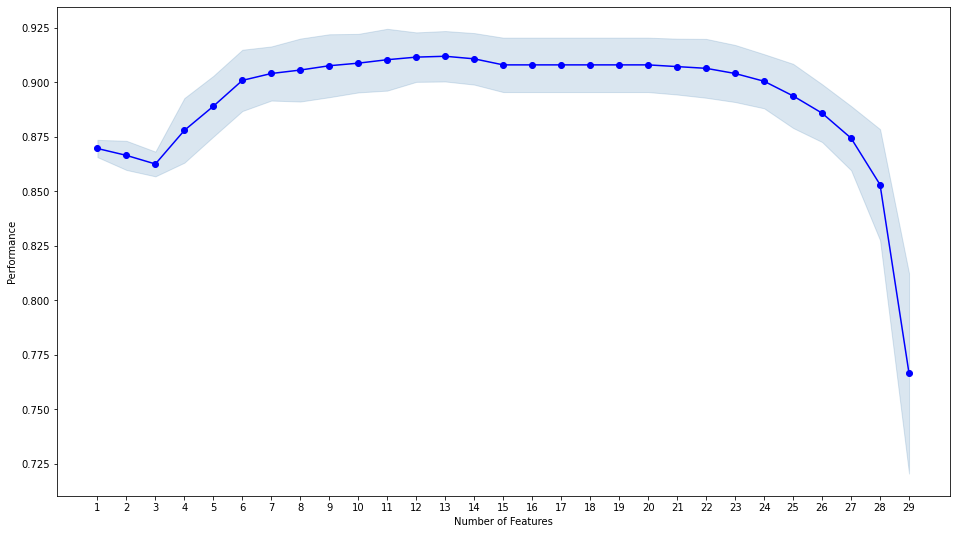

In [51]:
plot_sfs(sbs.get_metric_dict(), kind='std_dev')

In [52]:
gnb_feats = []
for feature_list_index in sbs.k_feature_names_:
    idx = int(feature_list_index)
    f = feat_labels[idx]
    print(f)
    gnb_feats.append(f)
    
X_important_train = sbs.transform(X_train)
X_important_test = sbs.transform(X_test)

IS_NODE_U_DEPOT
EDGE_WEIGHT
U_NODE_LOCAL_EDGE_RANK
V_NODE_LOCAL_EDGE_RANK
U_NODE_DEMAND_CAPACITY_RATIO
REDUCED_COST
NODE_U_EUC_DISTANCE_TO_NEAREST_CONVEX_HULL_VERTEX
NODE_V_EUC_DISTANCE_TO_NEAREST_CONVEX_HULL_VERTEX
CONVEX_HULL_EDGE_LENGTH
NODE_U_DIST_TO_CENTROID
NODE_V_DIST_TO_DEPOT
V_NODE_DBSCAN
AVERAGE_NODE_DBSCAN


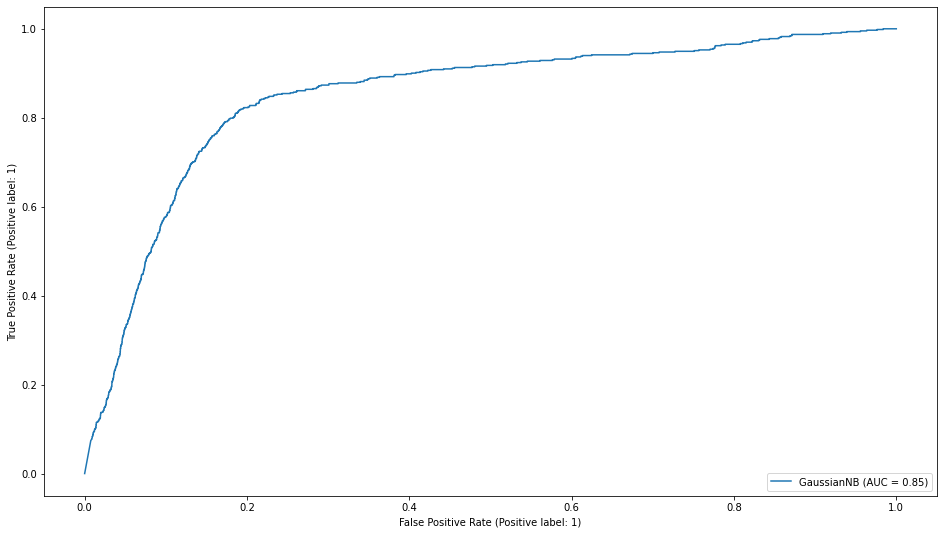

In [53]:
gnb_clf = eval_model(GaussianNB(), X_important_train, y_train, X_important_test, y_test)

In [54]:
decision_function = gnb_clf.predict_proba(X_important_test)[:,1]

[0.0, 0.398, 0.452, 0.496, 0.539, 0.586, 0.641, 0.707, 0.795, 0.919, 0.99]


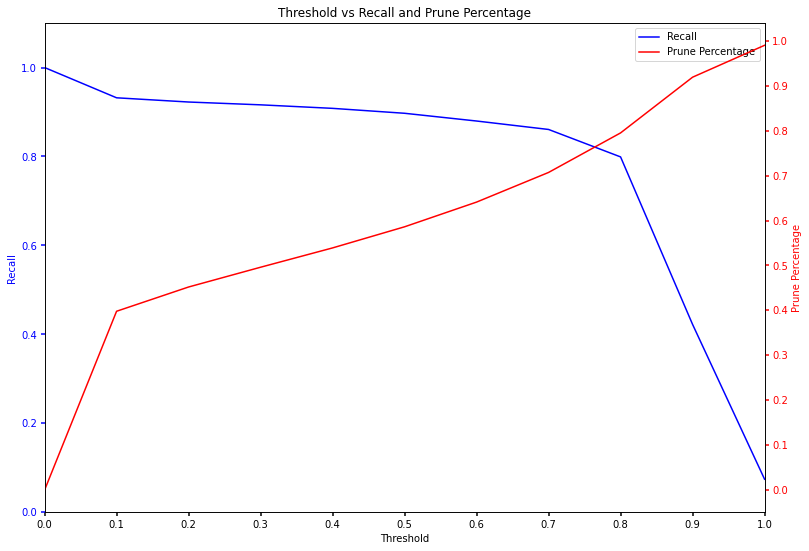

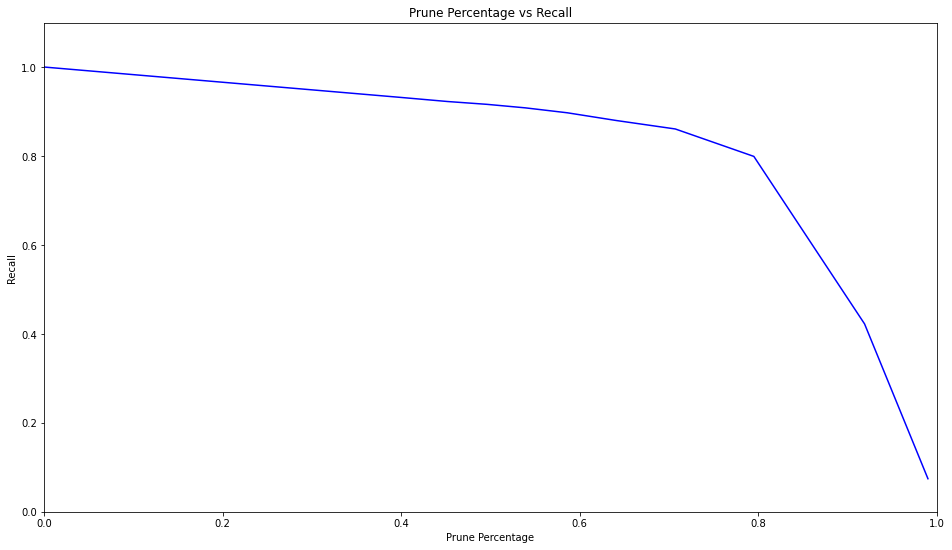

In [55]:
plot_recall_prune_percentage(decision_function, y_test)

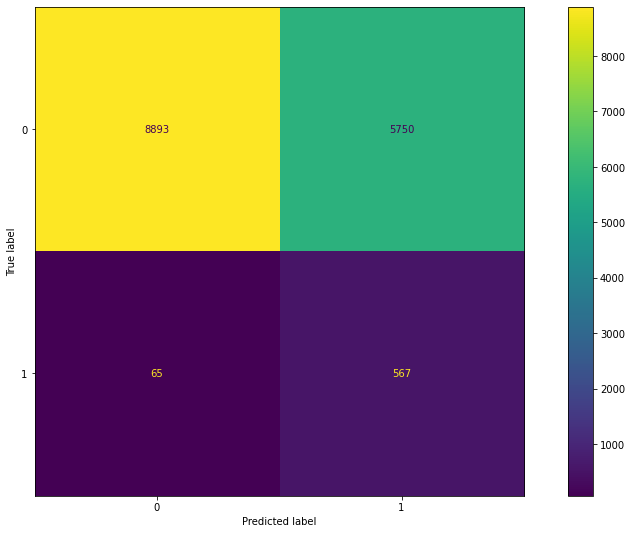

In [56]:
plot_confusion_matrix(gnb_clf, X_important_test, y_test)
plt.show()

# SVC

In [57]:
from sklearn.svm import SVC

In [58]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)

SVC(probability=True)

In [59]:
imps = permutation_importance(svc, X_test, y_test)

<AxesSubplot:>

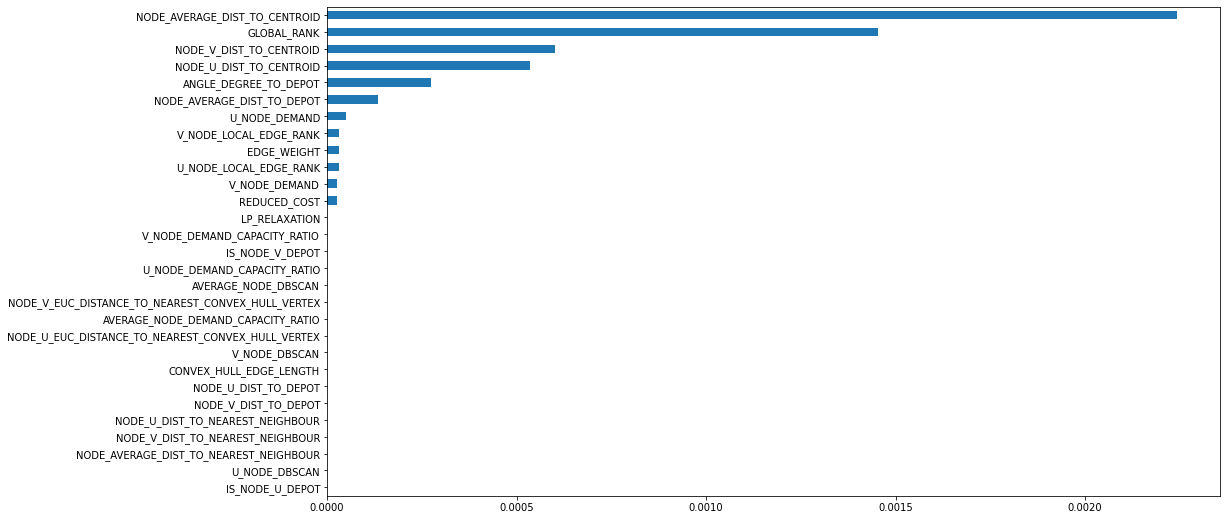

In [60]:
feat_importances = pd.Series(imps.importances_std, index=feat_labels)
feat_importances.nsmallest(50).plot(kind='barh')

In [61]:
sbs = SFS(svc, 
          k_features=(1, len(cvrp.columns)), 
          forward=False, 
          floating=False, 
          scoring='recall',
          cv=sss,
          n_jobs=-1)
sbs = sbs.fit(X_train, y_train)

(<Figure size 1152x648 with 1 Axes>,
 <AxesSubplot:xlabel='Number of Features', ylabel='Performance'>)

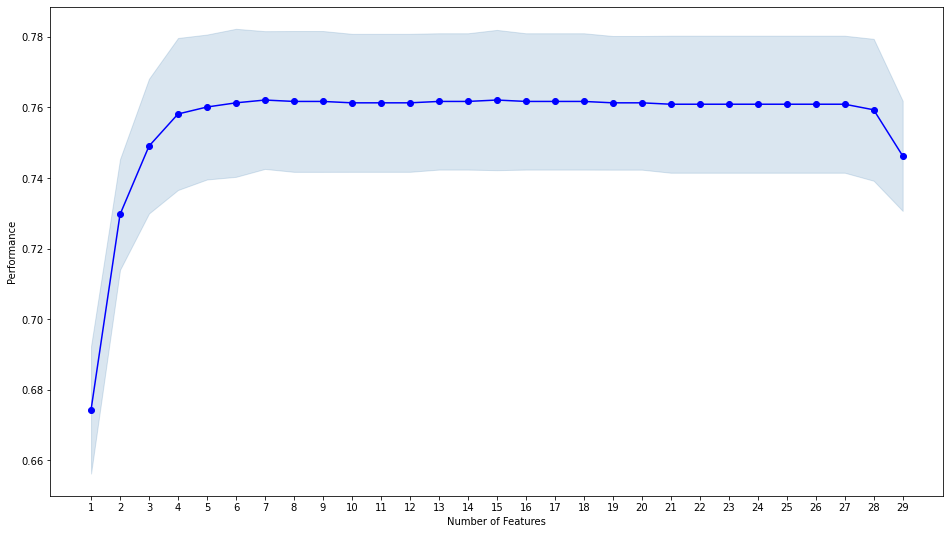

In [62]:
plot_sfs(sbs.get_metric_dict(), kind='std_dev')

In [63]:
svc_feats = []
for feature_list_index in sbs.k_feature_names_:
    idx = int(feature_list_index)
    f = feat_labels[idx]
    print(f)
    svc_feats.append(f)
    
X_important_train = sbs.transform(X_train)
X_important_test = sbs.transform(X_test)

IS_NODE_U_DEPOT
IS_NODE_V_DEPOT
EDGE_WEIGHT
GLOBAL_RANK
U_NODE_LOCAL_EDGE_RANK
V_NODE_LOCAL_EDGE_RANK
LP_RELAXATION
U_NODE_DEMAND
V_NODE_DEMAND
U_NODE_DEMAND_CAPACITY_RATIO
V_NODE_DEMAND_CAPACITY_RATIO
AVERAGE_NODE_DEMAND_CAPACITY_RATIO
NODE_V_DIST_TO_CENTROID
NODE_AVERAGE_DIST_TO_DEPOT
ANGLE_DEGREE_TO_DEPOT


In [64]:
C = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

svm = SVC(probability=True)
svm.fit(X_important_train, y_train)

# define grid search
grid = dict(C=C, gamma=gamma)
grid_search = GridSearchCV(estimator=svm, param_grid=grid, n_jobs=-1, cv=sss, scoring='recall', error_score=0)
grid_result = grid_search.fit(X_important_test, y_test)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.003175 using {'C': 0.6, 'gamma': 0.1}


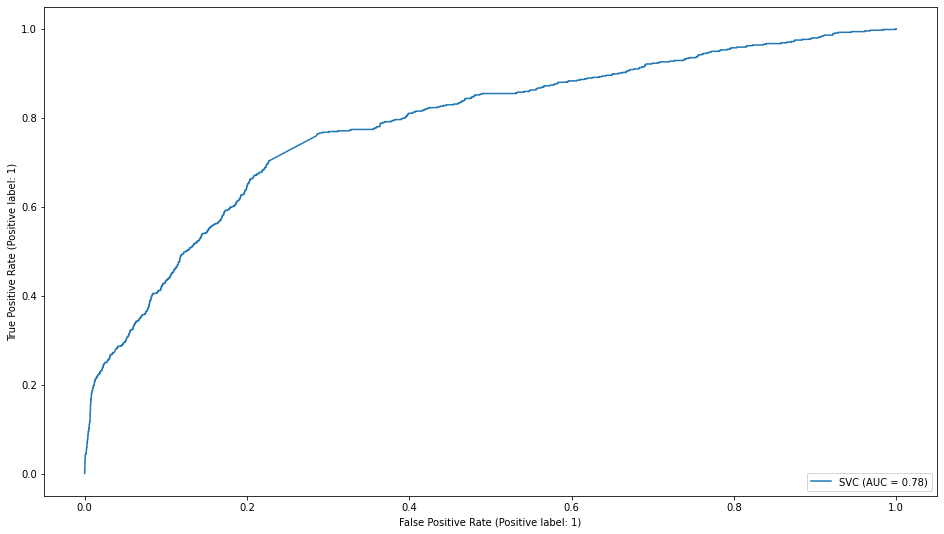

In [65]:
svc_clf = eval_model(SVC(probability=True, C=grid_result.best_params_['C'], gamma=grid_result.best_params_['gamma']), X_important_train, y_train, X_important_test, y_test)

In [66]:
decision_function = svc_clf.predict_proba(X_important_test)[:,1]

[0.0, 0.022, 0.053, 0.1, 0.21, 0.952, 0.968, 0.976, 0.982, 0.989, 1.0]


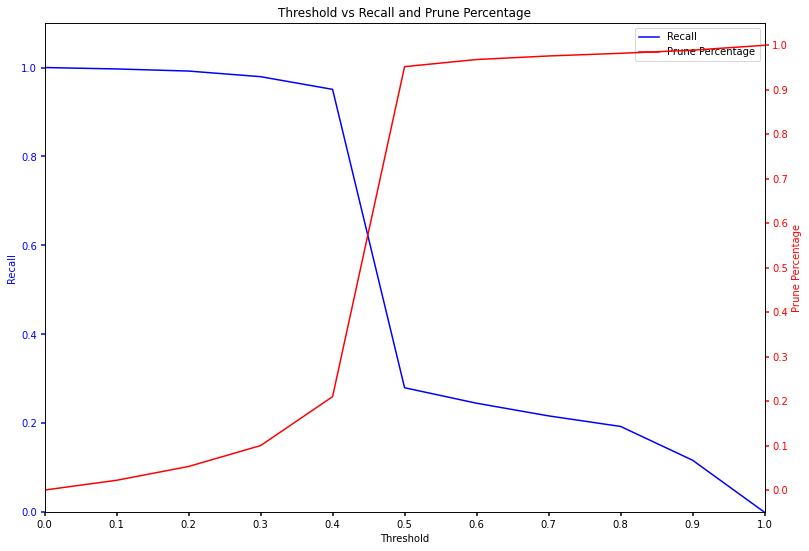

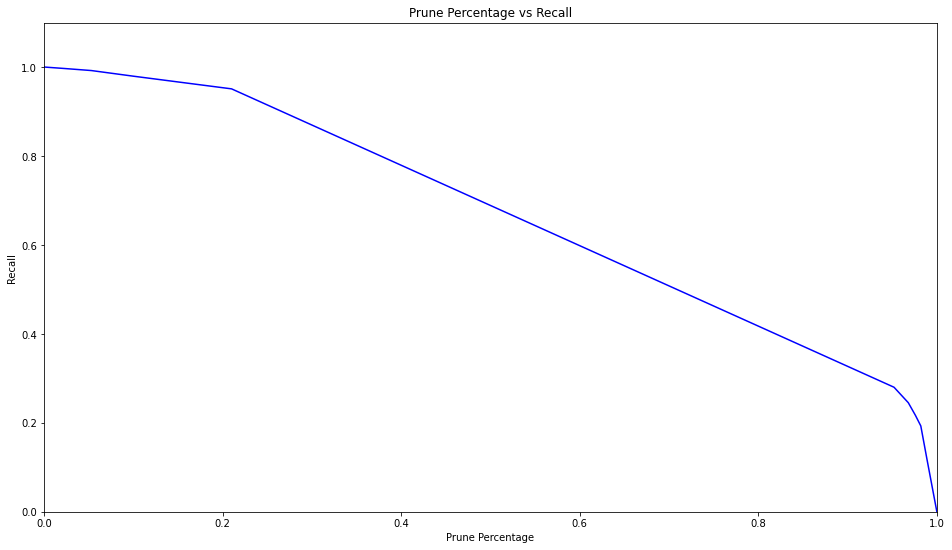

In [67]:
plot_recall_prune_percentage(decision_function, y_test)

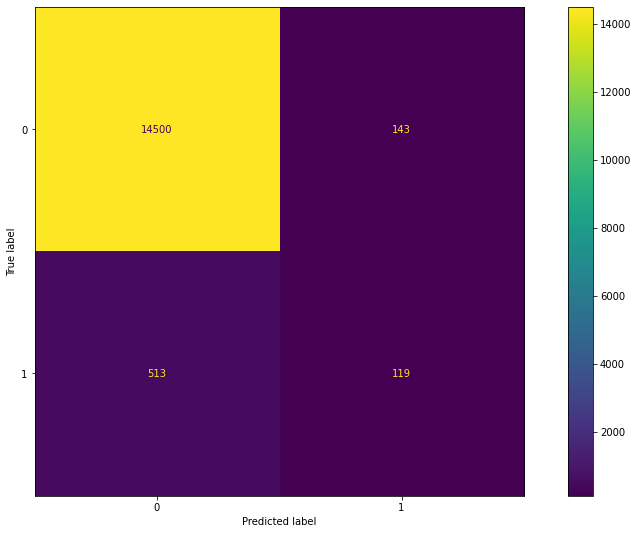

In [68]:
plot_confusion_matrix(svc_clf, X_important_test, y_test)
plt.show()

# Prune

In [438]:
df_prune = pd.read_csv('../../Data/data_prune.csv', index_col=0)

In [439]:
df_prune

,U_NODE_ID,V_NODE_ID,U_X,U_Y,V_X,V_Y,IS_NODE_U_DEPOT,IS_NODE_V_DEPOT,IS_OPTIMAL_EDGE,EDGE_WEIGHT,...,NODE_U_DIST_TO_DEPOT,NODE_V_DIST_TO_DEPOT,NODE_AVERAGE_DIST_TO_DEPOT,NODE_U_DIST_TO_NEAREST_NEIGHBOUR,NODE_V_DIST_TO_NEAREST_NEIGHBOUR,NODE_AVERAGE_DIST_TO_NEAREST_NEIGHBOUR,ANGLE_DEGREE_TO_DEPOT,U_NODE_DBSCAN,V_NODE_DBSCAN,AVERAGE_NODE_DBSCAN
0,1,2,40,40,22,22,1,0,0,0.509117,...,0.000000,0.509117,12.727922,0.0,0.0,0.0,0.000000,0.00,0.02,0.01
1,1,3,40,40,36,26,1,0,1,0.291204,...,0.000000,0.291204,7.280110,0.0,0.0,0.0,0.000000,0.00,0.04,0.02
2,1,4,40,40,21,45,1,0,0,0.392938,...,0.000000,0.392938,9.823441,0.0,0.0,0.0,0.000000,0.00,0.06,0.03
3,1,5,40,40,45,35,1,0,1,0.141421,...,0.000000,0.141421,3.535534,0.0,0.0,0.0,0.000000,0.00,0.08,0.04
4,1,6,40,40,55,20,1,0,0,0.500000,...,0.000000,0.500000,12.500000,0.0,0.0,0.0,0.000000,0.00,0.10,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445,50,45,12,38,21,48,0,0,0,0.269072,...,0.561427,0.412311,24.343433,0.0,0.0,0.0,43.927188,0.94,0.06,0.50
2446,50,46,12,38,50,30,0,0,0,0.776660,...,0.561427,0.282843,21.106737,0.0,0.0,0.0,15.974349,0.94,0.88,0.91
2447,50,47,12,38,51,42,0,0,0,0.784092,...,0.561427,0.223607,19.625839,0.0,0.0,0.0,1.769759,0.94,0.68,0.81
2448,50,48,12,38,50,15,0,0,0,0.888369,...,0.561427,0.538516,27.498581,0.0,0.0,0.0,35.270600,0.94,0.90,0.92


In [440]:
df_prune['FILE_NAME'][0]

'P-n50-k7.txt'

In [441]:
y_prune = df_prune.pop('IS_OPTIMAL_EDGE')
X = df_prune.values

In [442]:
extracted_X_val = df_prune[rf_clf_feats]

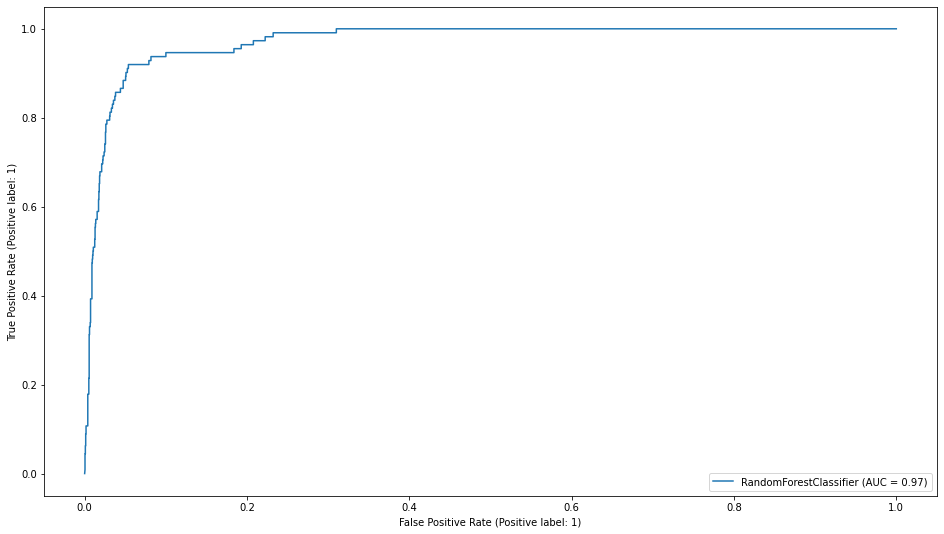

In [443]:
plot_roc_curve(rf_clf, extracted_X_val, y_prune)

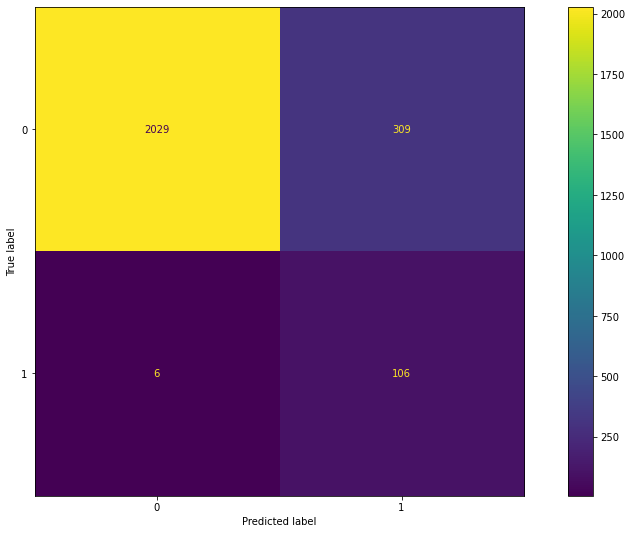

In [444]:
plot_confusion_matrix(rf_clf, extracted_X_val, y_prune)
plt.show()

In [445]:
rf_clf_feats

['EDGE_WEIGHT',
 'GLOBAL_RANK',
 'U_NODE_LOCAL_EDGE_RANK',
 'V_NODE_LOCAL_EDGE_RANK',
 'LP_RELAXATION',
 'U_NODE_DEMAND',
 'V_NODE_DEMAND',
 'V_NODE_DEMAND_CAPACITY_RATIO',
 'AVERAGE_NODE_DEMAND_CAPACITY_RATIO',
 'REDUCED_COST',
 'NODE_V_DIST_TO_CENTROID',
 'NODE_AVERAGE_DIST_TO_CENTROID',
 'NODE_U_DIST_TO_DEPOT',
 'NODE_V_DIST_TO_DEPOT',
 'NODE_AVERAGE_DIST_TO_DEPOT',
 'ANGLE_DEGREE_TO_DEPOT',
 'V_NODE_DBSCAN']

In [452]:
# change THRESHOLD to desired value
decision_function = np.where(rf_clf.predict_proba(extracted_X_val)[:,1] >= THRESHOLD, 1, 0)

In [453]:
probas = rf_clf.predict_proba(extracted_X_val)[:,1]

In [454]:
for i in range(0, len(decision_function)):
    if decision_function[i] == 0 and y_prune[i] == 1:
        print(probas[i], decision_function[i], y_prune[i])

[0.0, 0.651, 0.651, 0.651, 0.651, 0.651, 0.651, 0.651, 0.651, 0.651, 0.651]


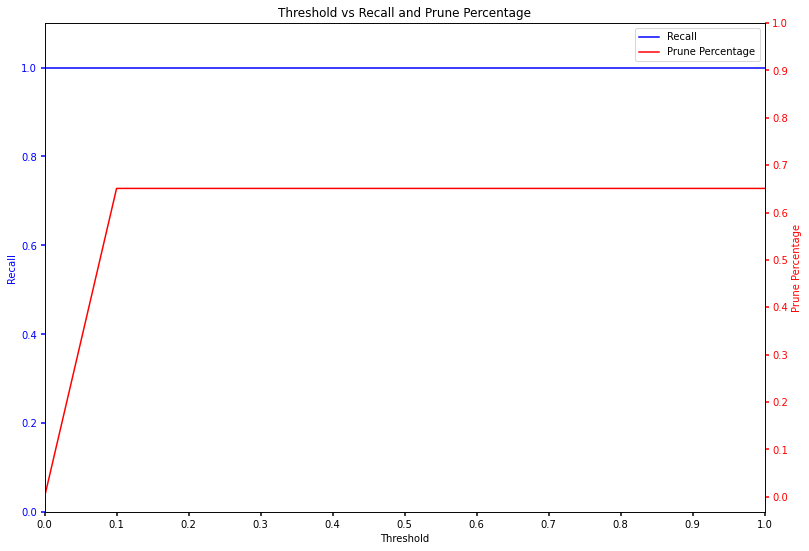

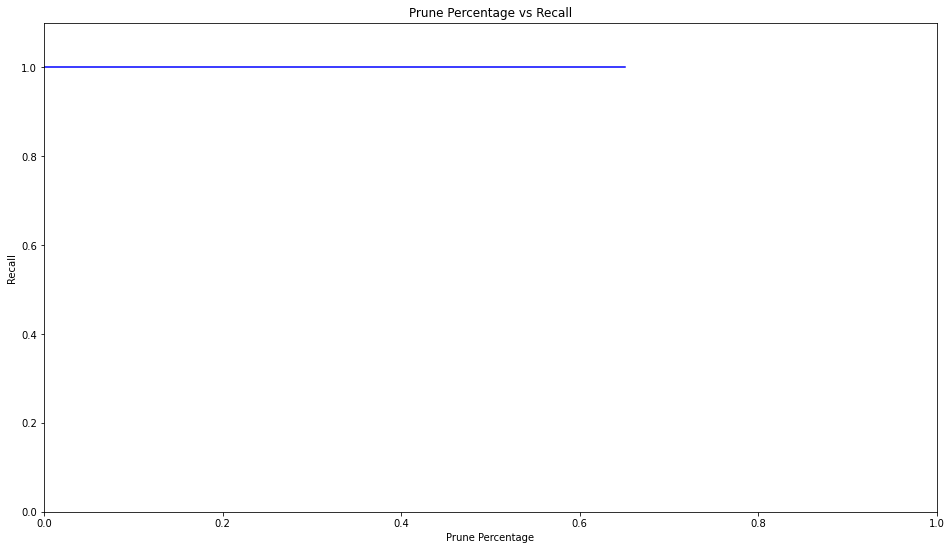

In [455]:
plot_recall_prune_percentage(decision_function, y_prune)

In [456]:
pruned = pd.DataFrame(decision_function)
df_prune['IS_OPTIMAL_EDGE_PRUNE'] = pruned

In [457]:
df_prune.to_csv(r'../../Data/data_pruned.csv', index = True)